# Librerías

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

# Conexión al repositorio de datos

In [3]:
#Accedemos a Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de datos

In [4]:
#Leemos los datos
#Se trata de un dataset que describe las características de billetes verdaderos y falsos
df = pd.read_csv('/content/drive/MyDrive/Data/billetes.csv')
df

#No entraremos mucho en los detalles de qué significa cada variable
#Cada variable indica una característica del billete
#El label "class" determina si un billete es o no falso

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Definición de "features"

In [5]:
#Definimos los features
### el .values lo pasa a una matriz
x = df[['variace', 'skewness', 'curtosis', 'entropy']].values
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
#En el caso de los features, vamos a escalarlos con valores entre 0 y 1

In [7]:
#Importamos la librería para escalar
from sklearn.preprocessing import scale

In [8]:
#Escalamos
x = scale(x)
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

# Definición de "labels"

In [9]:
#Definimos los labels
y = df['class'].values
y

array([0, 0, 0, ..., 1, 1, 1])

# Un modelo de Machine Learning clásico: Random Forest

In [10]:
#Por un momento vamos a usar otro modelo diferente a los de Deep Learning
#Vamos a usar un RandomForest
#Un RandomForest es un conjunto de árboles de decisión
#No nos importará cómo se crea, sólo lo usaremos para compararlo con la red neuronal
### Los métodos clásico muchos los usan para probar la validación cruzada.

#Importamos la librería
from sklearn.ensemble import RandomForestClassifier

In [11]:
#Creamos el modelo
model = RandomForestClassifier()

In [12]:
#Aplicamos validación cruzada para ver el ratio de predicción
### Los modelos clásico a resultados más rápidos en estas funciones.

#Importamos la función de validación cruzada
from sklearn.model_selection import cross_val_score

#Por defecto, la función realiza 5 validaciones
cross_val_score(model, x, y)

### Cuando los valores son parecidos, signfica que no depende de a aleatoriedad.

array([0.99272727, 0.99272727, 0.98905109, 0.99635036, 0.99635036])

# Generación de una neurona con ratio de aprendizaje

In [13]:
#Importamos la librería para dividir los datos
from sklearn.model_selection import train_test_split

#Dividimos los datos en datos de entrenamiento (x_train, y_train) y datos de validación (x_test, y_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
#Importamos las librerías de Keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Importamos un optimizador
#Ya sabemos que podemos usar el método de gradiente descendiente para encontrar el punto en dónde se mimice el error en nuestra función de costo
#Usaremos una gradiente descendiente conocida como SDG: Stocastic Descendent Gradiente (Gradiente descedente estocástica)
#¿Qué significa?, al decir que es estocástica significa que estamos colocando el punto inicial de evaluación de manera aleatoria
from tensorflow.keras.optimizers import SGD

In [15]:
#Instaciamos un modelo de machine learning vacío con "Sequential"
model = Sequential()

In [16]:
### Vamos a calibrar
#Agregamos sólo 1 neurona con 4 entradas
#Como estamos frente a un problema de clasificación binaria, la F.A. más adecuada es la "sigmoid"
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [17]:
#Compilamos probando un "learning rate" (lr) pequeño de 0.01
model.compile(
  loss='binary_crossentropy',
  optimizer=SGD(learning_rate=0.01),
  metrics=['accuracy']
)

In [18]:
#Entrenamos el modelo
#Esta vez al momento de entrenar, vamos a guardar la descripción del entrenamiento
#Configuramos 10 iteraciones
descripcion_de_entrenamiento = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 1s 1ms/step - loss: 0.9804 - accuracy: 0.0501 
Epoch 2/10
35/35 [==============================] - 0s 1ms/step - loss: 0.8931 - accuracy: 0.1057
Epoch 3/10
35/35 [==============================] - 0s 1ms/step - loss: 0.8235 - accuracy: 0.2853
Epoch 4/10
35/35 [==============================] - 0s 1ms/step - loss: 0.7673 - accuracy: 0.4512
Epoch 5/10
35/35 [==============================] - 0s 1ms/step - loss: 0.7211 - accuracy: 0.5296
Epoch 6/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.5907
Epoch 7/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6363
Epoch 8/10
35/35 [==============================] - 0s 1ms/step - loss: 0.6197 - accuracy: 0.6609
Epoch 9/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.6928
Epoch 10/10
35/35 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.7138


In [19]:
#Dentro de esta variable encontraremos el accuracy de entrenamiento y el error de ganancia de descubrimiento de patrones al entrenar (loss)
descripcion_de_entrenamiento.history

{'accuracy': [0.050136737525463104,
  0.1057429388165474,
  0.2853236198425293,
  0.45123061537742615,
  0.5296262502670288,
  0.5907019376754761,
  0.6362807750701904,
  0.6608933210372925,
  0.6927985548973083,
  0.7137647867202759],
 'loss': [0.980440616607666,
  0.893075168132782,
  0.8235042691230774,
  0.7672695517539978,
  0.7211014032363892,
  0.6819955110549927,
  0.6484199166297913,
  0.6197192668914795,
  0.5944024920463562,
  0.571670651435852]}

In [ ]:
#Dentro de esta variable también tenemos el número de iteraciones que nuestro modelo ha hecho
descripcion_de_entrenamiento.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#Evaluamos el modelo con los datos de entrenamiento
accuracy = model.evaluate(x_test, y_test)
accuracy

9/9 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.9418


[0.40964755415916443, 0.9418181777000427]

In [20]:
#Colocamos los datos en un dataframe de pandas
#El dataframe tendrá dos variables: accuracy y loss
dfDescripcion = pd.DataFrame(
    descripcion_de_entrenamiento.history,
    index = descripcion_de_entrenamiento.epoch
)

dfDescripcion

,loss,accuracy
0,0.980441,0.050137
1,0.893075,0.105743
2,0.823504,0.285324
3,0.767270,0.451231
4,0.721101,0.529626
5,0.681996,0.590702
6,0.648420,0.636281
7,0.619719,0.660893
8,0.594402,0.692799
9,0.571671,0.713765


# Calibración del ratio de aprendizaje

In [21]:
#¿El valor de lr = 0.01 será muy grande o muy pequeño?
#Vamos a calibrar el valor de lr para saberlo

In [22]:
#Probaremos diferentes valores para lr
array_lr = [0.01, 0.05, 0.1, 0.5]

In [24]:
#Creamos un array en donde guardaremos las descripciones de cada entrenamiento
array_descripciones = []

In [25]:
#Iteramos cada calibración
for lr in array_lr:
  model = Sequential()
  model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
  
  #Agregamos el "lr" de la calibración
  model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(learning_rate=lr),
    metrics=['accuracy']
  )
  
  #Entrenamos la neurona
  #Para evitar que el output de entrenamiento se muestre en pantalla desactivamos la variable "verbose"
  descripcion_de_entrenamiento = model.fit(x_train, y_train, epochs = 10, batch_size=16, verbose=0)

  #Convertimos la descripción del entrenamiento en un dataframe
  df = pd.DataFrame(
      descripcion_de_entrenamiento.history,
      index = descripcion_de_entrenamiento.epoch
  )

  #Agregamos el dataframe a la lista de descripciones de entrenamiento
  array_descripciones.append(df)

In [26]:
#Dentro de nuestro array de descripciones tendremos las descripciones de los cuatro entrenamientos con diferentes "lr"

#El primer entrenamiento con lr = 0.01
array_descripciones[0]

,loss,accuracy
0,1.146432,0.381951
1,0.854313,0.499544
2,0.658472,0.682771
3,0.537982,0.830447
4,0.464743,0.916135
5,0.417817,0.936190
6,0.385338,0.936190
7,0.360942,0.935278
8,0.341712,0.932543
9,0.325758,0.928897


In [27]:
#El segundo entrenamiento con lr = 0.05
array_descripciones[1]

,loss,accuracy
0,0.636404,0.627165
1,0.464232,0.768459
2,0.370977,0.830447
3,0.309635,0.884230
4,0.266062,0.922516
5,0.233919,0.942571
6,0.209497,0.956244
7,0.190270,0.958067
8,0.175184,0.961714
9,0.162602,0.965360


In [28]:
#Esto es un array de dataframes
type(array_descripciones)

list

In [ ]:
#Vamos a fusionar los cuatro dataframes en uno solo
#Para eso usamos la función "concat" de pandas
#Podríamos fusionar cada dataframe como si fuese un registro de la siguiente manera
dfDescripcion = pd.concat(array_descripciones)
dfDescripcion

,loss,accuracy
0,1.005324,0.399271
1,0.783567,0.534184
2,0.630632,0.680036
3,0.525974,0.804011
4,0.453674,0.868733
5,0.402829,0.919781
6,0.365800,0.959891
7,0.337906,0.969918
8,0.316213,0.971741
9,0.298730,0.969918


In [29]:
#Pero esta vez los fusionaremos uno tras otro para crear un único registro
#Recordemos que al usar "axis = 1" estamos fusionandolas filas
dfDescripcion = pd.concat(array_descripciones, axis = 1)
dfDescripcion

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,1.146432,0.381951,0.636404,0.627165,0.589771,0.737466,0.219748,0.941659
1,0.854313,0.499544,0.464232,0.768459,0.268158,0.944394,0.115080,0.972653
2,0.658472,0.682771,0.370977,0.830447,0.206646,0.957156,0.088209,0.977211
3,0.537982,0.830447,0.309635,0.884230,0.172996,0.964449,0.075589,0.977211
4,0.464743,0.916135,0.266062,0.922516,0.150987,0.971741,0.067897,0.978122
5,0.417817,0.936190,0.233919,0.942571,0.135140,0.972653,0.062748,0.977211
6,0.385338,0.936190,0.209497,0.956244,0.123508,0.973564,0.058803,0.979034
7,0.360942,0.935278,0.190270,0.958067,0.114276,0.974476,0.056021,0.979034
8,0.341712,0.932543,0.175184,0.961714,0.107031,0.976299,0.053413,0.979945
9,0.325758,0.928897,0.162602,0.965360,0.101086,0.976299,0.051597,0.979945


In [30]:
#A cada "loss" y "accuracy" vamos a agregarle por encima su lr
#Obtenemos el primer elemento del array de dataframes para obtener los títulos de las columnas
columnas_loss_accuracy = array_descripciones[0].columns
columnas_loss_accuracy

Index(['loss', 'accuracy'], dtype='object')

In [31]:
#Vamos a crear nuevas columnas a nuestro dataframe
#Primero colocaremos las columnas que tendrán el nombre de cada lr usado, estos valores están en "array_lr"
#Luego, para cada "lr" vamos a colocarle las columnas "columnas_loss_accuracy"
#Estas son columnas anidadas, las podemos crear con la función "MultiIndex" de Pandas
#Por último, con el parámetro "names" colocamos el nombre para cada agrupación de columnas
nuevas_columnas = pd.MultiIndex.from_product(
  [array_lr, columnas_loss_accuracy],
  names=['lr', 'metricas']
)

nuevas_columnas

MultiIndex([(0.01,     'loss'),
            (0.01, 'accuracy'),
            (0.05,     'loss'),
            (0.05, 'accuracy'),
            ( 0.1,     'loss'),
            ( 0.1, 'accuracy'),
            ( 0.5,     'loss'),
            ( 0.5, 'accuracy')],
           names=['lr', 'metricas'])

In [32]:
#Colocamos las nuevas columnas a nuestro dataframe
dfDescripcion.columns = nuevas_columnas
dfDescripcion

lr            0.01                0.05  ...      0.10      0.50          
metricas      loss  accuracy      loss  ...  accuracy      loss  accuracy
0         1.146432  0.381951  0.636404  ...  0.737466  0.219748  0.941659
1         0.854313  0.499544  0.464232  ...  0.944394  0.115080  0.972653
2         0.658472  0.682771  0.370977  ...  0.957156  0.088209  0.977211
3         0.537982  0.830447  0.309635  ...  0.964449  0.075589  0.977211
4         0.464743  0.916135  0.266062  ...  0.971741  0.067897  0.978122
5         0.417817  0.936190  0.233919  ...  0.972653  0.062748  0.977211
6         0.385338  0.936190  0.209497  ...  0.973564  0.058803  0.979034
7         0.360942  0.935278  0.190270  ...  0.974476  0.056021  0.979034
8         0.341712  0.932543  0.175184  ...  0.976299  0.053413  0.979945
9         0.325758  0.928897  0.162602  ...  0.976299  0.051597  0.979945

[10 rows x 8 columns]

In [33]:
#Vamos a crear el dataframe de "loss"
#Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
#En la función "xs" definimos:
# 1. El campo que queremos consultar (loss)
# 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
# 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
dfLoss = dfDescripcion.xs('loss', level = 'metricas', axis = 1)
dfLoss

lr,0.01,0.05,0.10,0.50
0,1.146432,0.636404,0.589771,0.219748
1,0.854313,0.464232,0.268158,0.115080
2,0.658472,0.370977,0.206646,0.088209
3,0.537982,0.309635,0.172996,0.075589
4,0.464743,0.266062,0.150987,0.067897
5,0.417817,0.233919,0.135140,0.062748
6,0.385338,0.209497,0.123508,0.058803
7,0.360942,0.190270,0.114276,0.056021
8,0.341712,0.175184,0.107031,0.053413
9,0.325758,0.162602,0.101086,0.051597


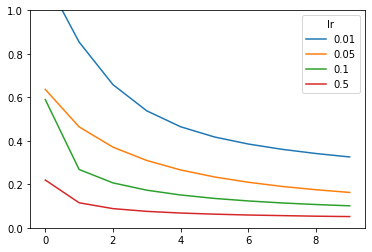

In [34]:
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "loss" en cada iteración significa que el error se está minimizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "loss"
#Como son cuatro lr, creará cuatro gráficos
dfLoss.plot(ylim=(0,1))

In [ ]:
#INTERPRETACIÓN
#Notemos como con un valor muy pequeño para "lr" (0.01), el "loss" disminuye muy lentamente y va de 0.6 a 0.4
#En cambio con un valor muy grande para "lr" (0.5), el "loss" disminuye más rápidamente y va de 0.2 a casi 0
#Eso significa que para este conjunto de datos el "lr" se optimiza al aumentarse
#Podríamos seguir aumentando el valor de "lr" para ver cuál es el límite en dónde ya no podemos optimizar más

In [35]:
#Vamos a crear el dataframe de "accuracy"
#Usaremos la función "xs" que nos permite navegar en un dataframe con índices complejos y extraer los campos que queremos
#En la función "xs" definimos:
# 1. El campo que queremos consultar (accuracy)
# 2. De qué subconjunto de campos queremos consultar (level = 'metricas')
# 3. Cómo queremos extraer la data (axis = 1, queremos extraerla como columnas)
dfAccuracy = dfDescripcion.xs('accuracy', level = 'metricas', axis = 1)
dfAccuracy

lr,0.01,0.05,0.10,0.50
0,0.381951,0.627165,0.737466,0.941659
1,0.499544,0.768459,0.944394,0.972653
2,0.682771,0.830447,0.957156,0.977211
3,0.830447,0.884230,0.964449,0.977211
4,0.916135,0.922516,0.971741,0.978122
5,0.936190,0.942571,0.972653,0.977211
6,0.936190,0.956244,0.973564,0.979034
7,0.935278,0.958067,0.974476,0.979034
8,0.932543,0.961714,0.976299,0.979945
9,0.928897,0.965360,0.976299,0.979945


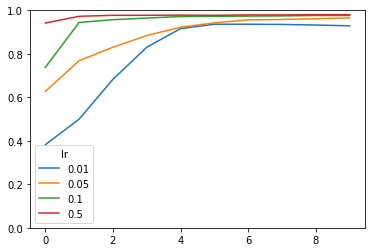

In [36]:
#Vamos a graficar este dataframe
#Recordemos que mientras más pequeño sea el "accuracy" en cada iteración significa que los aciertos se están maximizando
#En el eje X colocará los índices de cada iteración
#En el eje Y el valor de su "accuracy"
#Como son cuatro lr, creará cuatro gráficos
dfAccuracy.plot(ylim=(0,1))

In [ ]:
#INTERPRETACIÓN
#Notemos como con un valor muy pequeño para "lr" (0.01), el "accuracy" aumenta en 10 iteraciones hasta un 89%
#En cambio con un valor muy grande para "lr" (0.5), el "accuracy" aumenta en 10 iteraciones hasta un 98%
#Eso significa que para este conjunto de datos el "lr" se optimiza al aumentarse
#Podríamos seguir aumentando el valor de "lr" para ver cuál es el límite en dónde ya no podemos optimizar más